In [142]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer

# Read 2017 survey
df = pd.read_csv('2017UTASP20180628.csv',encoding='cp932')
df = df.loc[df['RESULT']>0]


# Replace missing answers with NAs
qs = ['Q4_{}'.format(i) for i in range(1,18)]
df.loc[:,qs] = df.loc[:,qs].replace(99,np.nan)

df.loc[:,'party'] = df.loc[:,'PARTY'].replace(range(1,12),['LDP','Komeito','JCP','JIP','SDP','Other','Kibo','CDP','Other','Other','Other'])

df.head()

,ID,NAME,RESPONSE,PREFEC,DISTRICT,PR,PRBLOCK,PARTY,MINSHIN,INCUMB,...,Q9_7,Q9_8,Q9_9,Q1_1_FA,Q1_2_FA,Q1_3_FA,SQ7_1_1_FA,SQ7_1_2_FA,SQ7_1_3_FA,party
0,1,船橋＝利実,1,1,1,0,51,1,66,2,...,1,1,2,NaN,NaN,NaN,NaN,NaN,NaN,LDP
1,2,道下＝大樹,1,1,1,0,51,8,2,1,...,5,5,5,経済・雇用,NaN,NaN,NaN,NaN,NaN,CDP
2,3,吉川＝貴盛,1,1,2,0,51,1,66,3,...,1,2,2,NaN,NaN,NaN,NaN,教育の充実,NaN,LDP
3,4,金倉＝昌俊,1,1,2,0,51,3,66,1,...,5,5,5,NaN,NaN,消費税10%中止,NaN,NaN,NaN,JCP
4,5,小和田＝康文,1,1,2,0,51,4,66,1,...,1,1,5,NaN,NaN,NaN,NaN,NaN,NaN,JIP


In [143]:
imputer = KNNImputer(n_neighbors=2, weights="uniform")
df.loc[:,qs] = imputer.fit_transform(df[qs])

df[qs].head(10)

,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5,Q4_6,Q4_7,Q4_8,Q4_9,Q4_10,Q4_11,Q4_12,Q4_13,Q4_14,Q4_15,Q4_16,Q4_17
0,1.0,3.0,1.0,1.0,1.0,3.0,1.0,3.0,2.0,3.0,3.0,3.0,2.0,3.0,3.0,2.0,4.0
1,3.0,5.0,5.0,1.0,5.0,5.0,4.0,5.0,2.0,1.0,5.0,3.0,5.0,1.0,3.0,1.0,5.0
2,1.0,3.0,1.0,1.0,1.5,3.0,2.0,2.0,2.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0
3,5.0,5.0,5.0,1.0,5.0,5.0,2.0,3.0,1.0,1.0,5.0,3.0,5.0,1.0,1.0,1.0,5.0
4,1.0,5.0,2.0,3.0,3.0,2.0,4.0,2.0,1.0,1.0,4.0,2.0,4.0,2.0,3.0,1.0,1.0
5,3.0,3.0,3.0,2.0,3.0,4.0,2.0,3.0,2.0,2.0,3.0,3.0,4.0,3.0,3.0,4.0,3.0
6,1.0,2.0,1.0,2.0,2.0,4.0,3.0,2.0,2.0,2.0,2.0,3.0,1.0,5.0,5.0,3.0,4.0
7,3.0,5.0,2.0,1.0,5.0,4.0,4.0,4.0,3.0,2.0,4.0,3.0,4.0,1.0,2.0,1.0,5.0
8,1.0,3.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0,3.0,3.0,3.0,1.0,3.0,4.0,2.0,4.0
9,2.0,2.0,3.0,1.0,3.0,4.0,2.0,4.0,1.0,4.0,5.0,2.0,5.0,1.0,2.0,2.0,1.0


[0.5, 17.5, -0.15, 8.5]

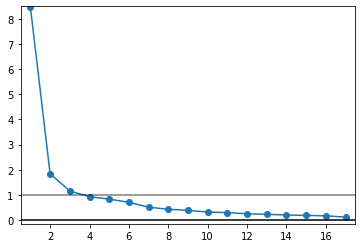

In [144]:
from factor_analyzer import FactorAnalyzer as FA

fa = FA(rotation=None).fit(df[qs])

plt.plot(range(1,18),fa.get_eigenvalues()[0])
plt.scatter(range(1,18),fa.get_eigenvalues()[0])
plt.plot([0,18],[1,1],color='k',alpha=0.5)
plt.plot([0,18],[0,0],color='k')
plt.axis([0.5,17.5,-0.15,8.5])

In [145]:
res = FA(rotation='promax',n_factors=3).fit(df[qs])

for i in range(res.n_factors):
    df['factor_{}'.format(i+1)] = res.transform(df[qs])[:,i]
    
df[['factor_{}'.format(i+1) for i in range(res.n_factors)]].corr()

,factor_1,factor_2,factor_3
factor_1,1.000000,-0.071447,-0.793837
factor_2,-0.071447,1.000000,-0.062473
factor_3,-0.793837,-0.062473,1.000000


In [146]:
loadings = pd.DataFrame(res.loadings_,index=['National Defence','Preemptive Strike','North Korea Pressure','Nuclear non-proliferation','Yasukuni Shrine','Small Government','Public Works','Fiscal Stimulus','Free Education','Progressive Taxation','Security','Migrant Workers','Nuclear Power','Maiden Name','Gay Marriage','Election Age','Unicameralism'],columns=['factor {}'.format(i+1) for i in range(res.n_factors)])

loadings.to_csv('loadings.csv')
loadings

,factor 1,factor 2,factor 3
National Defence,0.882574,-0.062964,0.251408
Preemptive Strike,0.359817,-0.526466,0.047098
North Korea Pressure,0.801058,-0.122284,0.096747
Nuclear non-proliferation,0.243155,0.959264,-0.165245
Yasukuni Shrine,0.492121,-0.433396,0.000541
Small Government,0.178988,-0.636856,0.205639
Public Works,-0.057345,-0.117565,-0.736359
Fiscal Stimulus,0.138650,-0.290629,-0.351243
Free Education,0.047435,0.780009,0.005672
Progressive Taxation,-0.103948,0.725475,0.116288


In [147]:
names = ['安倍＝晋三','岸田＝文雄','菅＝義偉','石破＝茂','志位＝和夫','枝野＝幸男','玉木＝雄一郎','斎藤＝鉄夫']

data = df.loc[df.NAME.isin(names),['NAME'] + ['factor_{}'.format(i+1) for i in range(res.n_factors)]]
data.loc[:,'Name'] = data.loc[:,'NAME'].replace(names,['Abe Shinzo','Kishida Fumio','Suga Yoshihide','Ishiba Shigeru','Shi Kazuo','Edano Yukio','Tamaki Yuichiro','Saito Tetsuo'])
data

,NAME,factor_1,factor_2,factor_3,Name
174,枝野＝幸男,0.214210,-0.968156,-1.000884,Edano Yukio
355,菅＝義偉,-1.469338,1.280678,0.474893,Suga Yoshihide
732,石破＝茂,-0.758297,-0.030912,0.933655,Ishiba Shigeru
759,岸田＝文雄,-1.135376,0.501619,0.399182,Kishida Fumio
796,安倍＝晋三,-1.364277,0.552681,0.546290,Abe Shinzo
809,玉木＝雄一郎,-0.017353,-0.278823,-0.131906,Tamaki Yuichiro
1008,志位＝和夫,1.400030,0.878638,-1.084446,Shi Kazuo


Text(0, 0.5, 'Dimension 2')

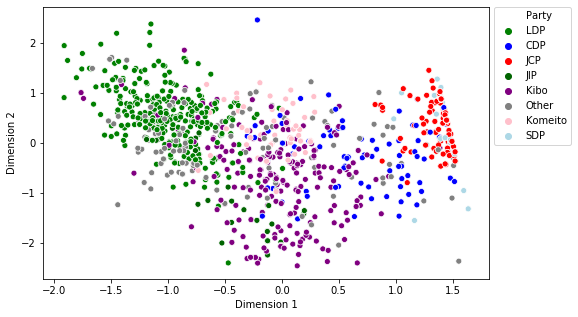

In [148]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='factor_1',y='factor_2',hue='party',data=df,palette=['green','blue','red','darkgreen','purple','grey','pink','lightblue'])
legend = plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
legend.texts[0].set_text('Party')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')